In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers, optimizers, callbacks
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.applications import EfficientNetB0
import tensorflow as tf


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

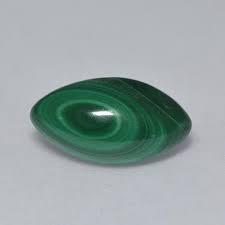

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

# Create train and test dir paths
train_data_dir = "/Users/jeromebiot/Documents/AI_data_science_machine_learning_LeWagon/Space_Gem/train/"
test_data_dir = "/Users/jeromebiot/Documents/AI_data_science_machine_learning_LeWagon/Space_Gem/test/"

img = load_img(f"{train_data_dir}Malachite/malachite_15.jpg")
X = img_to_array(img)

img

In [7]:
X.shape

(225, 225, 3)

In [8]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers, optimizers, callbacks
from tensorflow.keras.utils import image_dataset_from_directory

# Creating a base model

In [9]:
base_model = Sequential()

base_model.add(layers.Input((225, 225, 3)))

base_model.add(layers.Flatten())

base_model.add(layers.Dense(87, activation="softmax"))

base_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 151875)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 87)             │    13,213,212 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,213,212 (50.40 MB)

 Trainable params: 13,213,212 (50.40 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
adam = optimizers.Adam(learning_rate = 0.001)
base_model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

batch_size = 64

# Create a training dataset
train_ds = image_dataset_from_directory(
    train_data_dir,
    labels="inferred",
    label_mode="categorical",
    seed=123,
    image_size=(225, 225),
    batch_size=batch_size
)

# We define a second one for the test data

val_ds = image_dataset_from_directory(
    test_data_dir,
    labels="inferred",
    label_mode="categorical",
    seed=123,
    image_size=(225, 225),
    batch_size=batch_size
)

Found 2856 files belonging to 87 classes.
Found 363 files belonging to 87 classes.


In [11]:
# Fitting the base model

base_history = base_model.fit(
        train_ds,
        epochs=5,
        validation_data=val_ds,
        )

Epoch 1/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 6s 122ms/step - accuracy: 0.0210 - loss: 1090.9908 - val_accuracy: 0.0275 - val_loss: 846.7500
Epoch 2/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 120ms/step - accuracy: 0.0508 - loss: 659.6978 - val_accuracy: 0.0854 - val_loss: 231.6046
Epoch 3/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - accuracy: 0.1073 - loss: 211.5703 - val_accuracy: 0.1102 - val_loss: 159.6122
Epoch 4/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - accuracy: 0.1475 - loss: 158.1338 - val_accuracy: 0.1240 - val_loss: 224.3414
Epoch 5/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - accuracy: 0.1467 - loss: 217.0019 - val_accuracy: 0.1405 - val_loss: 255.8046


# Creating a better model

In [12]:
model_v2_1 = Sequential()

model_v2_1.add(layers.Input((225, 225, 3)))
model_v2_1.add(layers.Rescaling(1./225))

model_v2_1.add(layers.Conv2D(filters = 32, kernel_size = (3,3), activation="relu", padding="same"))
model_v2_1.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same") )


model_v2_1.add(layers.Conv2D(filters = 32, kernel_size = (3,3), activation="relu", padding="same"))
model_v2_1.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same") )


model_v2_1.add(layers.Conv2D(filters = 64, kernel_size = (3,3), activation="relu", padding="same"))
model_v2_1.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same") )

model_v2_1.add(layers.Flatten())

# Here we flatten our data to end up with just one dimension

model_v2_1.add(layers.Dense(64, activation="relu"))

model_v2_1.add(layers.Dropout(0.5))

model_v2_1.add(layers.Dense(87, activation="softmax"))

model_v2_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 225, 225, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 225, 225, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 113, 113, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 113, 113, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 57, 57, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 57, 57, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 29, 29, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 53824)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │     3,444,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 87)             │         5,655 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,479,095 (13.27 MB)

 Trainable params: 3,479,095 (13.27 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
adam = optimizers.Adam(learning_rate = 0.001)

In [16]:
MODEL = "model_v2_1.keras"

modelCheckpoint = callbacks.ModelCheckpoint(MODEL,
                                            monitor="val_loss",
                                            verbose=0,
                                            save_best_only=True)

LRreducer = callbacks.ReduceLROnPlateau(monitor="val_loss",
                                        factor=0.1,
                                        patience=3,
                                        verbose=1,
                                        min_lr=0)

EarlyStopper = callbacks.EarlyStopping(monitor='val_loss',
                                       patience=10,
                                       verbose=0,
                                       restore_best_weights=True)

In [17]:
model_v2_1.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

history = model_v2_1.fit(
        train_ds,
        epochs=50,
        validation_data=val_ds,
        batch_size=batch_size,
        callbacks=[modelCheckpoint,LRreducer, EarlyStopper]
        )

Epoch 1/50
26/45 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.0099 - loss: 4.6605

KeyboardInterrupt: 

In [ ]:
from tensorflow.keras.preprocessing import image

img_path = '/kaggle/input/gemstones-images/test/Coral/coral_18.jpg'
img = image.load_img(img_path, target_size=(225, 225))

# Convert the image to a numpy array
img_array = image.img_to_array(img)

# Add an extra batch dimension since the model expects batches of input
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)

class_names = train_ds.class_names
predicted_class = np.argmax(prediction[0])
predicted_label = class_names[predicted_class]

print(f"Predicted class: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted class: Kunzite


# Exporting the improved model

In [ ]:
model_v2_1.save('../models/model_v2_1.keras')

# Plotting learning plots

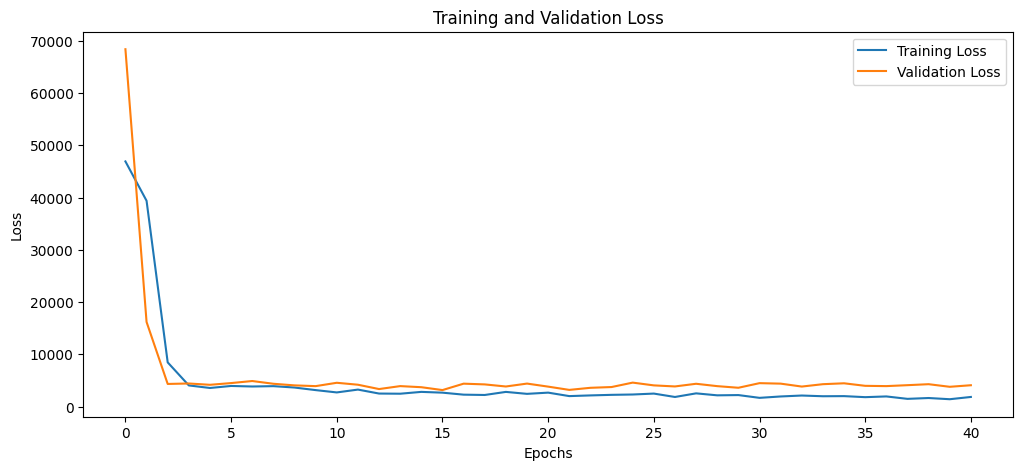

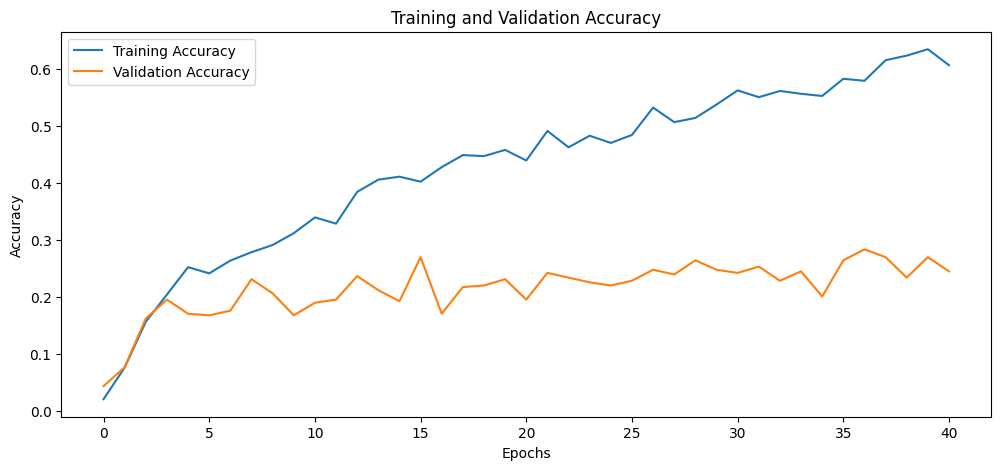

In [ ]:
# Plot loss
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
best_val_acc = max(history.history['val_accuracy'])

In [ ]:
curr_val_acc = max(history.history['val_accuracy'])

if curr_val_acc > best_val_acc:
    best_val_acc = curr_val_acc
print (f"Current val_acc: {curr_val_acc}")
print (f"Best val_acc: {best_val_acc}")

Current val_acc: 0.2837465703487396
Best val_acc: 0.2837465703487396


# Exporting current best model

In [ ]:
base_model.save('../models/current_model.keras')